In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.neural_network import MLPClassifier


#ensemble classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import statsmodels.formula.api as sm

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

In [169]:
data=pd.read_excel("data/train_test_dataset.xlsx")
data.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194


In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 19 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null object
INCOME      9216 non-null object
CHILD       4549 non-null object
GNDR        9216 non-null object
OWNHOME     9216 non-null object
SPORT       4273 non-null float64
COMP        9216 non-null object
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(1), int64(11), object(7)
memory usage: 1.3+ MB


In [171]:
data.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE            0
INCOME         0
CHILD       4667
GNDR           0
OWNHOME        0
SPORT       4943
COMP           0
PCTMARR        0
HOMEVAL        0
dtype: int64

In [172]:
data.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194


In [173]:
data['AGE'] = pd.to_numeric(data['AGE'], errors = 'coerce')
data['INCOME'] = pd.to_numeric(data['INCOME'], errors = 'coerce')
data['GNDR'] = pd.to_numeric(data2['GNDR'], errors = 'coerce')
data['OWNHOME'] = pd.to_numeric(data2['OWNHOME'], errors = 'coerce')

In [174]:
age = data['AGE'].median()
income = data['INCOME'].median()
data.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,NaN,0.0,1.0,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,NaN,NaN,NaN,0.0,2.0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,NaN,0.0,0.0,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,,0.0,1.0,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,,1.0,1.0,0.0,,65,194


In [175]:
data.GNDR.fillna(2, inplace=True)
data.OWNHOME.fillna(2, inplace=True)
data.AGE.fillna(age, inplace=True)
data.INCOME.fillna(income, inplace=True)

data.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,NaN,0.0,1.0,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,63.0,3.0,NaN,0.0,2.0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,NaN,0.0,0.0,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,,0.0,1.0,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,,1.0,1.0,0.0,,65,194


In [176]:
data.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE            0
INCOME         0
CHILD       4667
GNDR           0
OWNHOME        0
SPORT       4943
COMP           0
PCTMARR        0
HOMEVAL        0
dtype: int64

In [177]:
y = data['Y2defect']
X = data[['BACKER','AGE', 'INCOME', 'Y1G1','Y1G2']]

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.03, random_state=0)

In [179]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [180]:
#This model is 58.5% accurate
print metrics.accuracy_score(y_test, dt.predict(X_test))
print metrics.confusion_matrix(y_test, dt.predict(X_test))
print metrics.classification_report(y_test, dt.predict(X_test))
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.584837545126
[[93 44]
 [71 69]]
             precision    recall  f1-score   support

          0       0.57      0.68      0.62       137
          1       0.61      0.49      0.55       140

avg / total       0.59      0.58      0.58       277

0.585844629823


# Data Visualization Set 1 Analysis

(array([  875.,  1287.,     0.,   853.,     0.,  3177.,  1557.,     0.,
          763.,   704.]),
 array([ 0. ,  0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ]),
 <a list of 10 Patch objects>)

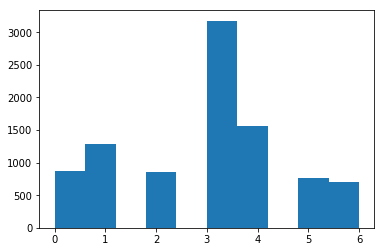

In [181]:
plt.hist(data['INCOME'])
#This is telling us that there are greater amount of people with level 3 or 4 income

(array([    5.,   103.,   524.,   875.,  1143.,   958.,  3265.,  1250.,
          860.,   233.]),
 array([ 12. ,  20.5,  29. ,  37.5,  46. ,  54.5,  63. ,  71.5,  80. ,
         88.5,  97. ]),
 <a list of 10 Patch objects>)

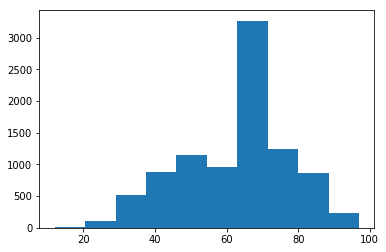

In [182]:
plt.hist(data['AGE'])
#Majority of people in this data set are between the ages of 60 and 80

(array([  3.23100000e+03,   1.82200000e+03,   1.43400000e+03,
          1.73300000e+03,   9.79000000e+02,   7.00000000e+00,
          3.00000000e+00,   4.00000000e+00,   1.00000000e+00,
          2.00000000e+00]),
 array([  2. ,   4.2,   6.4,   8.6,  10.8,  13. ,  15.2,  17.4,  19.6,
         21.8,  24. ]),
 <a list of 10 Patch objects>)

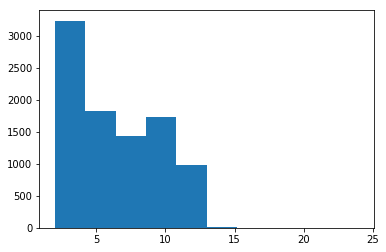

In [194]:
plt.hist(data['YEARS'])


# Exploratory Data Set 1 Anlysis

In [195]:
data.corr()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,SPORT,PCTMARR,HOMEVAL
Y2defect,1.000000,-0.101921,0.028869,-0.040159,-0.109634,-0.141604,-0.023498,-0.139099,-0.189929,-0.022697,0.010530,0.010035,0.002714,0.020711,-0.023869,0.029722
Y1G5,-0.101921,1.000000,0.092901,-0.150656,0.116103,0.123291,0.043975,0.121479,0.045319,0.028507,-0.000865,0.017903,-0.010248,0.002598,0.008064,-0.000382
Y1G4,0.028869,0.092901,1.000000,-0.082485,-0.076326,-0.094967,-0.003481,-0.095750,-0.090743,-0.061787,0.006825,0.000821,-0.007609,0.025304,0.001259,0.001030
Y1G3,-0.040159,-0.150656,-0.082485,1.000000,-0.091538,-0.135977,-0.045239,-0.100829,0.005308,-0.025990,0.020746,-0.015541,0.018320,-0.000396,-0.006574,0.001812
Y1G2,-0.109634,0.116103,-0.076326,-0.091538,1.000000,0.206763,0.061990,0.320802,0.276530,0.096830,-0.013631,-0.012479,-0.010221,-0.002006,0.019234,-0.013760
Y1G1,-0.141604,0.123291,-0.094967,-0.135977,0.206763,1.000000,-0.003982,0.244241,0.256153,0.085067,-0.028290,0.009737,-0.008993,0.002462,0.024756,-0.014693
Y1price,-0.023498,0.043975,-0.003481,-0.045239,0.061990,-0.003982,1.000000,0.043768,-0.090287,-0.029670,0.071470,0.018849,0.002446,0.018550,0.008032,0.095580
YEARS,-0.139099,0.121479,-0.095750,-0.100829,0.320802,0.244241,0.043768,1.000000,0.533836,0.281932,-0.089712,-0.012121,0.004264,-0.049982,0.023691,-0.049689
BACKER,-0.189929,0.045319,-0.090743,0.005308,0.276530,0.256153,-0.090287,0.533836,1.000000,0.182871,-0.084987,-0.005481,-0.000694,-0.037559,0.032558,-0.064727
AGE,-0.022697,0.028507,-0.061787,-0.025990,0.096830,0.085067,-0.029670,0.281932,0.182871,1.000000,-0.217381,0.008658,0.002574,-0.046613,-0.053910,-0.014759


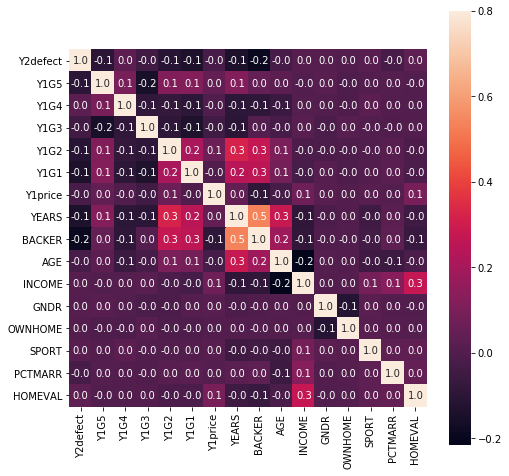

In [196]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), vmax=.8, square=True, annot=True, fmt=".1f")
#The most correlation appears to be btween YEARS & BACKER

# Validation Data Set

In [183]:
data2=pd.read_excel("data/validation_dataset.xlsx")
data2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,NaN,0,1,0.0,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0,,0.0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,NaN,0,0,NaN,1,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,1,0,1,NaN,,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,NaN,1,1,0.0,,65,110


In [184]:
#drop child, sport, and comp because there too many missing values plus, it does not efficciently support my analysis
data2 = data2.drop('CHILD', axis=1)
data2 = data2.drop('SPORT', axis=1)
data2 = data2.drop('COMP', axis=1)
data2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,0,1,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,0,0,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,0,1,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,1,1,65,110


In [185]:
data2['AGE'] = pd.to_numeric(data2['AGE'], errors = 'coerce')
data2['INCOME'] = pd.to_numeric(data2['INCOME'], errors = 'coerce')
data2['GNDR'] = pd.to_numeric(data2['GNDR'], errors = 'coerce')
data2['OWNHOME'] = pd.to_numeric(data2['OWNHOME'], errors = 'coerce')


data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 16 columns):
FAKEID      9542 non-null object
Y3defect    0 non-null float64
Y2G5        9542 non-null int64
Y2G4        9542 non-null int64
Y2G3        9542 non-null int64
Y2G2        9542 non-null int64
Y2G1        9542 non-null int64
Y2price     9542 non-null int64
YEARS       9542 non-null int64
BACKER      9542 non-null int64
AGE         7055 non-null float64
INCOME      7127 non-null float64
GNDR        8977 non-null float64
OWNHOME     7590 non-null float64
PCTMARR     9542 non-null int64
HOMEVAL     9542 non-null int64
dtypes: float64(5), int64(10), object(1)
memory usage: 1.2+ MB


In [186]:
age = data2['AGE'].median()
income = data2['INCOME'].median()
data2.GNDR.fillna(2, inplace=True)
data2.OWNHOME.fillna(2, inplace=True)
data2.AGE.fillna(age, inplace=True)
data2.INCOME.fillna(income, inplace=True)

data2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4.0,0.0,1.0,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5.0,0.0,2.0,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,63.0,3.0,0.0,0.0,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4.0,0.0,1.0,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4.0,1.0,1.0,65,110


In [187]:
data2.isnull().sum()

FAKEID         0
Y3defect    9542
Y2G5           0
Y2G4           0
Y2G3           0
Y2G2           0
Y2G1           0
Y2price        0
YEARS          0
BACKER         0
AGE            0
INCOME         0
GNDR           0
OWNHOME        0
PCTMARR        0
HOMEVAL        0
dtype: int64

# Data2 Visualization Analysis

(array([  871.,  1275.,     0.,   819.,     0.,  3624.,  1486.,     0.,
          765.,   702.]),
 array([ 0. ,  0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ]),
 <a list of 10 Patch objects>)

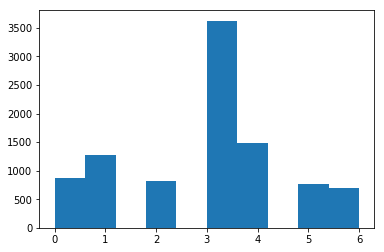

In [205]:
plt.hist(data2['INCOME'])
#Majority of people fall are label as three or four when it comes to income

(array([  3.00000000e+00,   2.50000000e+01,   2.68000000e+02,
          7.76000000e+02,   1.19100000e+03,   1.08100000e+03,
          3.70900000e+03,   1.26800000e+03,   9.39000000e+02,
          2.82000000e+02]),
 array([  8.,  17.,  26.,  35.,  44.,  53.,  62.,  71.,  80.,  89.,  98.]),
 <a list of 10 Patch objects>)

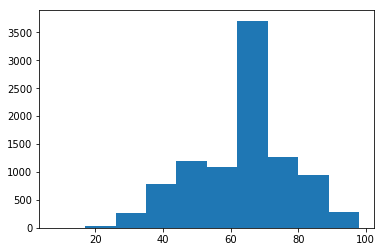

In [203]:
plt.hist(data2['AGE'])
#Most people are between the ages of 60 and 80

(array([ 4916.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4626.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

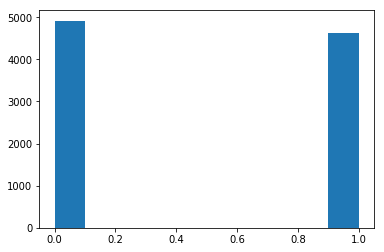

In [204]:
plt.hist(data2['BACKER'])
#The amount of backers are almost equal

# Exploratory Data 2 Analysis

In [206]:
data2.corr()

,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
Y3defect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y2G5,NaN,1.000000,0.007713,0.057423,0.021634,0.096453,0.089316,0.105501,0.180600,0.012654,0.001872,-0.036473,0.019189,0.007308,0.015538
Y2G4,NaN,0.007713,1.000000,-0.052441,-0.148794,0.050348,-0.019234,0.100296,0.053399,-0.017688,-0.001639,0.005535,0.005597,0.004612,-0.013398
Y2G3,NaN,0.057423,-0.052441,1.000000,0.001669,-0.005759,0.019278,0.069078,0.063429,0.004468,-0.003015,-0.012557,0.038940,-0.003324,-0.015174
Y2G2,NaN,0.021634,-0.148794,0.001669,1.000000,-0.101482,-0.029676,-0.044439,0.047534,-0.009180,-0.010112,-0.005983,-0.018740,0.000061,0.016080
Y2G1,NaN,0.096453,0.050348,-0.005759,-0.101482,1.000000,-0.022213,0.185428,0.104893,0.038533,-0.011470,0.011526,0.000838,0.011760,-0.024720
Y2price,NaN,0.089316,-0.019234,0.019278,-0.029676,-0.022213,1.000000,0.015137,-0.116282,-0.028437,0.095756,0.022510,-0.048936,-0.015772,0.086208
YEARS,NaN,0.105501,0.100296,0.069078,-0.044439,0.185428,0.015137,1.000000,0.492478,0.221807,-0.083416,0.011227,0.028822,0.020784,-0.051347
BACKER,NaN,0.180600,0.053399,0.063429,0.047534,0.104893,-0.116282,0.492478,1.000000,0.167755,-0.087741,-0.010777,0.031486,0.010910,-0.047955
AGE,NaN,0.012654,-0.017688,0.004468,-0.009180,0.038533,-0.028437,0.221807,0.167755,1.000000,-0.210852,0.027324,-0.016700,-0.052407,0.011090


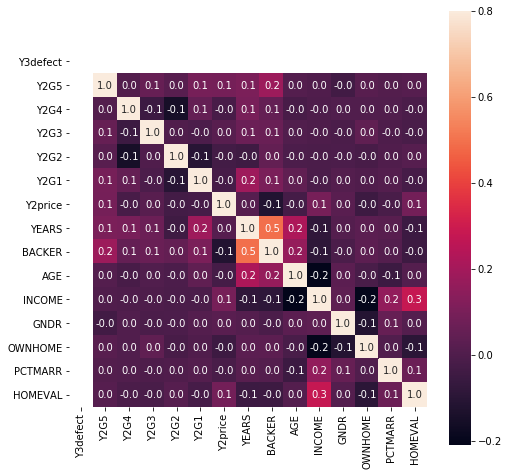

In [208]:
plt.figure(figsize=(8,8))
sns.heatmap(data2.corr(), vmax=.8, square=True, annot=True, fmt=".1f")
#Years and Backers have the most correlation 

# Model deployment

In [188]:
validation = data2[['BACKER', 'YEARS', 'INCOME', 'Y2G1', 'Y2G2']]
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 5 columns):
BACKER    9542 non-null int64
YEARS     9542 non-null int64
INCOME    9542 non-null float64
Y2G1      9542 non-null int64
Y2G2      9542 non-null int64
dtypes: float64(1), int64(4)
memory usage: 372.8 KB


In [189]:
fakeid = pd.DataFrame(data2['FAKEID'])
fakeid.head()

,FAKEID
0,580D24RR
1,179Q96NO
2,050Z45TB
3,399V18KY
4,009A52KP


In [190]:
output_scoring = dt.predict(validation)


In [191]:
probs = dt.predict_proba(validation)
probs = pd.DataFrame(probs, columns=['Probability of Renewal', 'Probability of Defect'])

In [192]:
risky_fans = fakeid.join(probs)


In [193]:
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted Defect'])
risky_fans = risky_fans.join(predicted_y)
risky_fans

,FAKEID,Probability of Renewal,Probability of Defect,Predicted Defect
0,580D24RR,1.000000,0.000000,0
1,179Q96NO,1.000000,0.000000,0
2,050Z45TB,1.000000,0.000000,0
3,399V18KY,1.000000,0.000000,0
4,009A52KP,1.000000,0.000000,0
5,059D43VJ,0.000000,1.000000,1
6,874Y07FS,0.000000,1.000000,1
7,789T58LZ,0.000000,1.000000,1
8,958H17RR,1.000000,0.000000,0
9,309O88WT,1.000000,0.000000,0


In [162]:
risky_fans.to_csv("data/submissionentry.csv", index=False)